# Spotify Music Streaming 
# Table of Contents
1. [Introduction](#Introduction)
2. [Data Preparation](#Data-Preparation)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Question 1: How do average tempo and danceability levels vary across different music genres?](#question-1-how-do-average-tempo-and-danceability-levels-vary-across-different-music-genres)
5. [Question 2: Is there any correlation between Energy and Danceability?](#question-2-is-there-any-correlation-between-energy-and-danceability)
6. [Question 3: How do danceability and valence interact across different genres?](#question-3-how-do-danceability-and-valence-interact-across-different-genres)
7. [Question 4: How do energy and loudness levels vary across various music genres?](#question-4-how-do-energy-and-loudness-levels-vary-across-various-music-genres)
# Introduction
This report looks into the analysis of Spotify music streaming data, aiming to uncover patterns and insights related to different attributes of music tracks. We explore how various features such as tempo, danceability, loudness, energy, and valence correlate with one another as well as across different genres.

# Data Preparation

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
df1 = pd.read_csv('genres_v2.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_11430/4028231336.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('genres_v2.csv')


In [5]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
df2 = pd.read_csv('playlists.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Playlist  39 non-null     object
 1   Genre     39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [7]:
df2.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [8]:
print(df1.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [9]:
print(df2.isnull().sum())

Playlist    0
Genre       0
dtype: int64


In [10]:
df1.drop(columns=['Unnamed: 0', 'title', 'type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'mode'], inplace=True)

In [11]:
print(df1.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
id                      0
duration_ms             0
genre                   0
song_name           20786
dtype: int64


In [12]:
df1['song_name'].fillna('Unknown', inplace=True)

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_11430/2140829492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['song_name'].fillna('Unknown', inplace=True)


In [13]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
print(df1.columns)
print(df2.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'genre', 'song_name'],
      dtype='object')
Index(['playlist', 'genre'], dtype='object')


In [15]:
merged_df = pd.merge(df1, df2, left_on='genre', right_on='genre', how='inner')

In [16]:
print(merged_df.head())
print(f"Shape of merged DataFrame: {merged_df.shape}")
print(merged_df.describe(include='all'))

   danceability  energy  key  loudness  speechiness  acousticness  \
0         0.831   0.814    2    -7.364         0.42        0.0598   
1         0.831   0.814    2    -7.364         0.42        0.0598   
2         0.831   0.814    2    -7.364         0.42        0.0598   
3         0.831   0.814    2    -7.364         0.42        0.0598   
4         0.831   0.814    2    -7.364         0.42        0.0598   

   instrumentalness  liveness  valence    tempo                      id  \
0            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
1            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
2            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
3            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
4            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   

   duration_ms      genre            song_name                playlist  
0       124539  Dark Trap  Mercury: Retrograde  19WuHd4MxWLzE

In [17]:
merged_df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
genre               0
song_name           0
playlist            0
dtype: int64

In [18]:
merged_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
genre                object
song_name            object
playlist             object
dtype: object

In [19]:
unique_keys = merged_df['key'].unique()
print(unique_keys)

[ 2  8  5  0  1 11 10  6  7  9  4  3]


In [20]:
merged_df['key'] = merged_df['key'].astype('category')

# Exploratory Data Analysis 

In [21]:
merged_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000
mean,0.640232,0.672124,-6.816974,0.158851,0.167220,0.083819,0.198505,0.410168,152.442228,199689.078977
std,0.164815,0.187146,2.966376,0.135390,0.219114,0.231762,0.153884,0.233549,29.079427,60565.124169
min,0.065100,0.000243,-33.357000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000,38333.000000
25%,0.524000,0.541000,-8.435000,0.049900,0.011800,0.000000,0.101000,0.214000,129.985000,156223.500000
50%,0.654000,0.680000,-6.405000,0.104000,0.069800,0.000002,0.132000,0.392000,149.975000,199173.000000
75%,0.768000,0.824000,-4.766000,0.246000,0.237000,0.001050,0.258000,0.585000,175.330000,236093.000000
max,0.988000,0.999000,3.148000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000,728413.000000


In [22]:
numerical_df = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.209545 -0.074167     0.196718     -0.019075   
energy               -0.209545  1.000000  0.711265     0.062653     -0.482647   
loudness             -0.074167  0.711265  1.000000     0.016599     -0.365350   
speechiness           0.196718  0.062653  0.016599     1.000000      0.009826   
acousticness         -0.019075 -0.482647 -0.365350     0.009826      1.000000   
instrumentalness     -0.173129 -0.030661 -0.236158    -0.218300     -0.014298   
liveness             -0.110047  0.226831  0.145870     0.118979     -0.115431   
valence               0.314255  0.240285  0.231627     0.198325     -0.052662   
tempo                -0.083156  0.045193  0.035191     0.105812     -0.015485   
duration_ms          -0.143710  0.000305  0.008273    -0.121596      0.013565   

                  instrumentalness  liveness   valence     tempo  duration_ms  
danceability             -0.

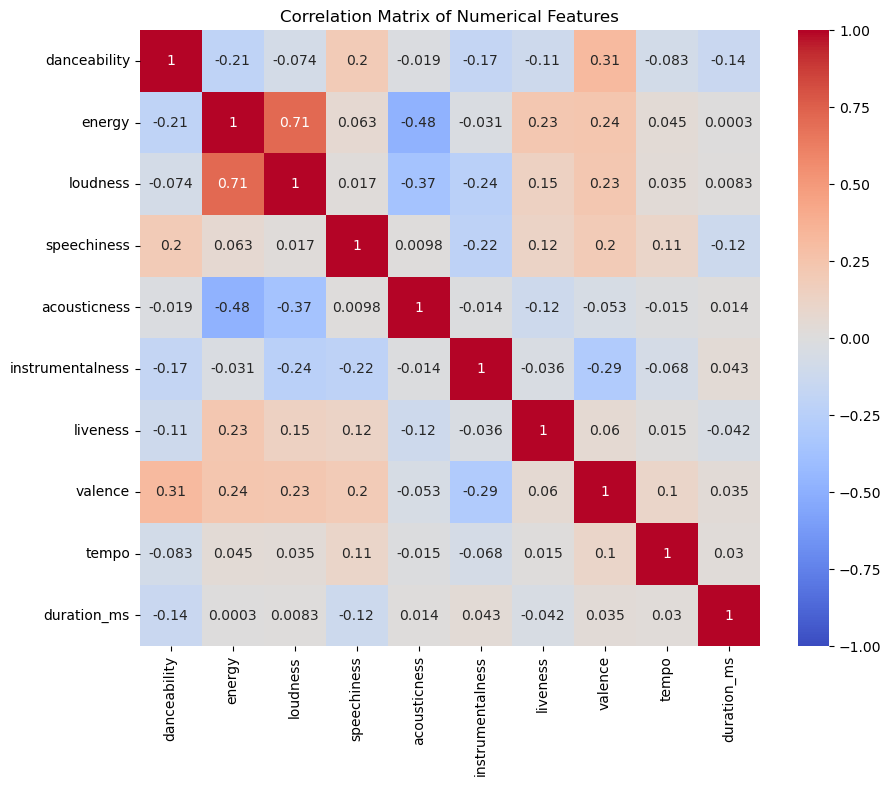

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Interpretation of Heatmap
##### Strong Positive Correlations:
###### danceability and valence (.31): moderate positive correlation, indicating that more danceable tracks tend to have a higher valence (happiness or positivity)

###### energy and loudness (.71): high positive correlation suggests that tracks with higher energy levels tend to also be louder.

###### energy and valence (.24): moderate positive correlation suggests that tracks with higher energy levels are also more likely to be more positive or happier.

###### Liveness and energy (.23): moderate positive correlations suggests that tracks that are more lively have higher energy levels.

##### Strong Negative Correlations: 
###### acousticness and energy (-.48): A strong negative correlation suggests that tracks with higher acousticness tend to have lower energy levels.

###### instrumentalness and valence (-.29): moderate negative correlation indicates that tracks with higher instrumentalness (less vocals) are often less positive or happier.

###### danceability and energy (-.21): mild negative correlation indicates that ss one increases, the other tends to decrease, but the relationship is not very strong

##### Unexpected Findings:
###### Tempo does not have any strong correlations 

# Question 1. How do average tempo and danceability levels vary across different music genres?

In [25]:
avg_tempo_by_genre = merged_df.groupby('genre')['tempo'].mean().reset_index()
avg_tempo_by_genre.columns = ['genre', 'average tempo']

avg_danceability_by_genre = merged_df.groupby('genre')['danceability'].mean().reset_index()
avg_danceability_by_genre.columns = ['genre', 'average danceability']

In [26]:
merged_tempo_danceability = pd.merge(avg_tempo_by_genre, avg_danceability_by_genre, on='genre', how='left')
merged_tempo_danceability.head(8)

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
1,Emo,153.888640,0.493699
2,Hiphop,162.980479,0.698982
3,Pop,152.098937,0.676807
4,Rap,126.006374,0.742877
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [27]:
merged_tempo_danceability['genre'] = merged_tempo_danceability['genre'].astype(str)
merged_tempo_danceability['average tempo'] = merged_tempo_danceability['average tempo'].astype(float)
merged_tempo_danceability['average danceability'] = merged_tempo_danceability['average danceability'].astype(float)

print(merged_tempo_danceability.dtypes)

genre                    object
average tempo           float64
average danceability    float64
dtype: object


Text(0, 0.5, 'Genre')

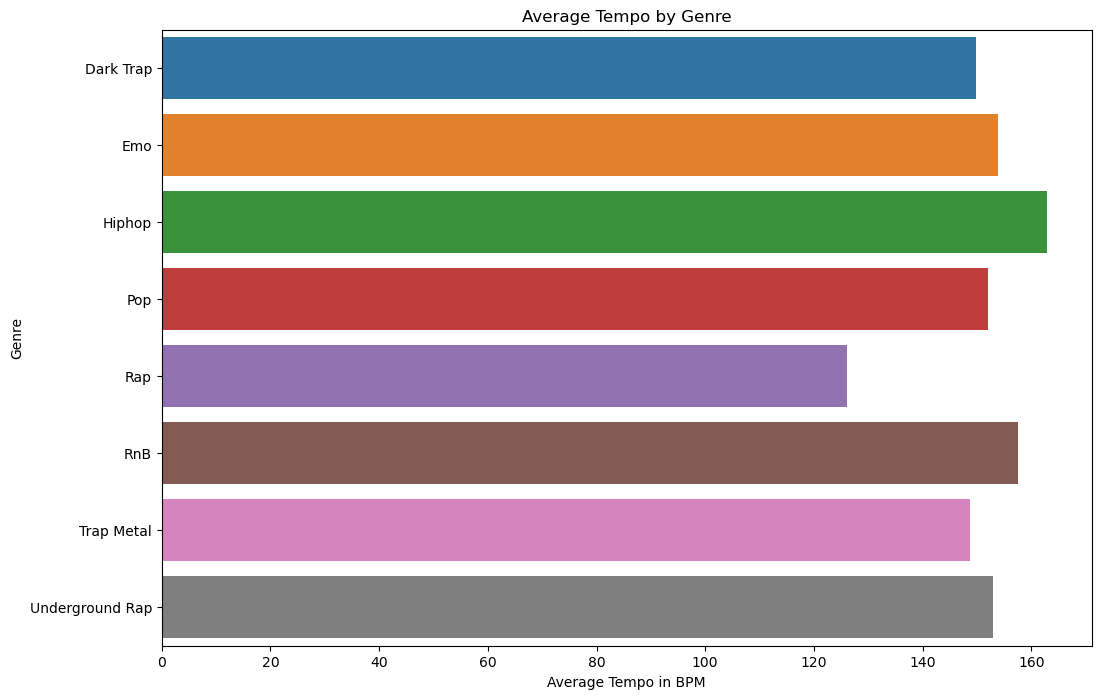

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average tempo', y='genre', data=avg_tempo_by_genre, hue='genre')

plt.title('Average Tempo by Genre')
plt.xlabel('Average Tempo in BPM')
plt.ylabel('Genre')

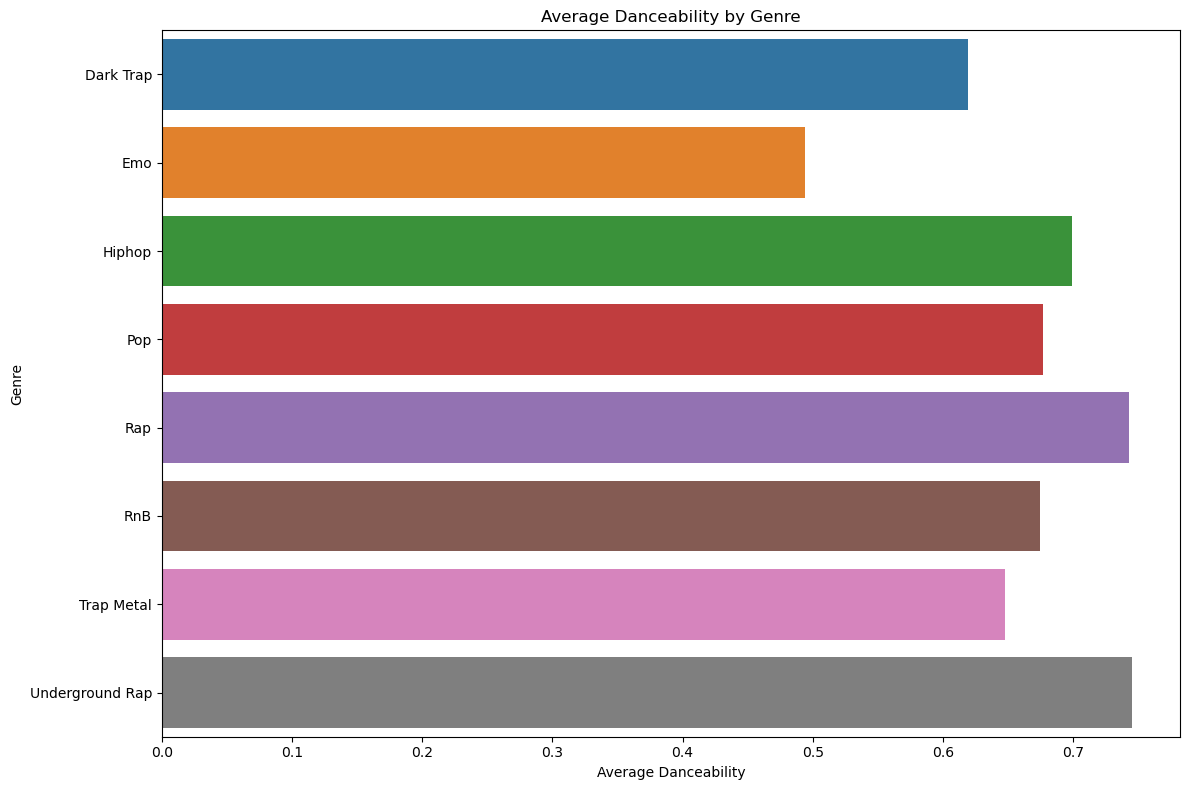

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average danceability', y='genre', data=avg_danceability_by_genre, hue='genre')

plt.title('Average Danceability by Genre')
plt.xlabel('Average Danceability')
plt.ylabel('Genre')
plt.tight_layout()

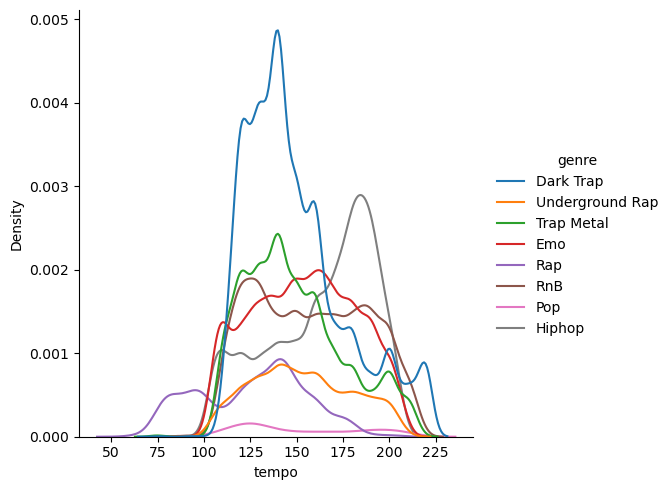

In [30]:
sns.displot(merged_df, x='tempo', hue='genre', kind='kde')

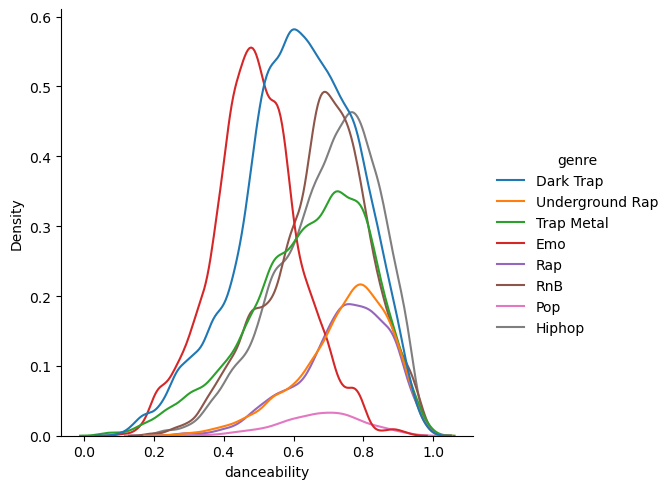

In [31]:
sns.displot(merged_df, x='danceability', hue='genre', kind='kde')

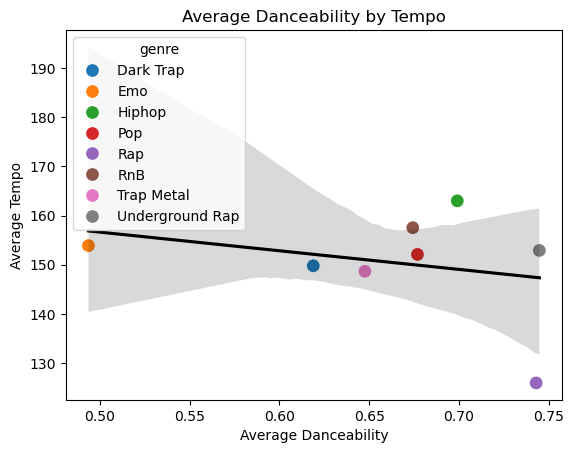

In [32]:
sns.scatterplot(
    data=merged_tempo_danceability, 
    x='average danceability', 
    y='average tempo', 
    hue="genre",
    palette="tab10",
    s=100)

sns.regplot(
    data=merged_tempo_danceability, 
    x='average danceability', 
    y='average tempo', 
    scatter=False,
    line_kws={'color': 'black'}
)

plt.xlabel('Average Danceability')
plt.ylabel('Average Tempo')
plt.title('Average Danceability by Tempo')
plt.show()

In [34]:
correlation = merged_tempo_danceability['average tempo'].corr(merged_tempo_danceability['average danceability'])
print(f"Correlation between Average Tempo and Average Danceability: {correlation}")

Correlation between Average Tempo and Average Danceability: -0.28068477113136747


In [35]:
def is_outlier(column: pd.Series):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~column.between(lower_bound, upper_bound)

merged_tempo_danceability[~is_outlier(merged_tempo_danceability['average tempo'])]

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
1,Emo,153.888640,0.493699
3,Pop,152.098937,0.676807
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [36]:
def is_outlier(column: pd.Series):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~column.between(lower_bound, upper_bound)

merged_tempo_danceability[~is_outlier(merged_tempo_danceability['average danceability'])]

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
2,Hiphop,162.980479,0.698982
3,Pop,152.098937,0.676807
4,Rap,126.006374,0.742877
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [37]:
# Filtered out 'emo' and 'rap' genres
filtered_data = merged_tempo_danceability[~merged_tempo_danceability['genre'].isin(['Emo', 'Rap'])]
correlation = filtered_data['average tempo'].corr(filtered_data['average danceability'])
print(f"Correlation between Average Tempo and Average Danceability (omitting emo and rap): {correlation}")

Correlation between Average Tempo and Average Danceability (omitting emo and rap): 0.44537958654919263


## Interpretation
Our goal was to see if there was any correlation between the tempo of a genre and the danceability per song.

First we needed to group the tempos and danceability categories together by genre type. We then took the mean for each category to so that we were working with one numerical data point per genre per category. We merged those two new values into its own data frame and converted the data types to strings and floats as needed.

We made two bar plots to showcase the averages for each category by genre as a visual. Here we see that ‘Rap’ has the slowest tempo whereas ‘Hiphop’ has the fastest. For danceability, ‘Underground Rap’ has the highest value just barely squeaking past ‘Rap’, whereas ‘Emo’ has the slowest.

We chose to display this information differently via a distribution plot, using the data from the original data frame and breaking it down by genre. Here it shows that for tempo there are a few genres, like ‘Dark Trap’ for instance, that appear to have the majority of their tempo in a small range of 120-150 where as ‘Pop’ is more spread out across the entire range. Danceability had a similar display where ‘Pop’ is once again spread across the full range whereas other genres seemed to peak between a smaller range.

Overall there seems to be a weak negative correlation between danceability and tempo. When taking a look at the lined scatter plot above we noticed that the genres of 'Rap' and 'Emo' seemed to be outliers for the dataset. After removing both of them and running the correlation again it improved from a -0.28 to a .45. This updated data indicates a moderate correlation between the two features.

We created a regression plot to showcase how the two variables interact with one another and found that, combined with running a correlation test, there seems to be a weak negative correlation between danceability and tempo. When taking a look at the lined scatter plot above we noticed that the genres of 'Rap' and 'Emo' seemed to be outliers for the dataset. After removing both of them and running the correlation again it improved from a -0.28 to a .45. This updated data indicates a moderate correlation between the two features.

# Question 2. Is there any correlation between Energy and Danceability?

In [50]:
energy_dance_correlation = merged_df['energy'].corr(merged_df['tempo'])
print(f"Correlation between Average Energy and Average Danceability: {correlation}")

Correlation between Average Energy and Average Danceability: 0.44537958654919263


In [46]:
genre_correlations= merged_df.groupby('genre')[['energy','danceability']].corr()
print(genre_correlations)

                                energy  danceability
genre                                               
Dark Trap       energy        1.000000     -0.147589
                danceability -0.147589      1.000000
Emo             energy        1.000000     -0.200580
                danceability -0.200580      1.000000
Hiphop          energy        1.000000     -0.047332
                danceability -0.047332      1.000000
Pop             energy        1.000000     -0.045525
                danceability -0.045525      1.000000
Rap             energy        1.000000     -0.201469
                danceability -0.201469      1.000000
RnB             energy        1.000000      0.138669
                danceability  0.138669      1.000000
Trap Metal      energy        1.000000     -0.317364
                danceability -0.317364      1.000000
Underground Rap energy        1.000000     -0.217778
                danceability -0.217778      1.000000


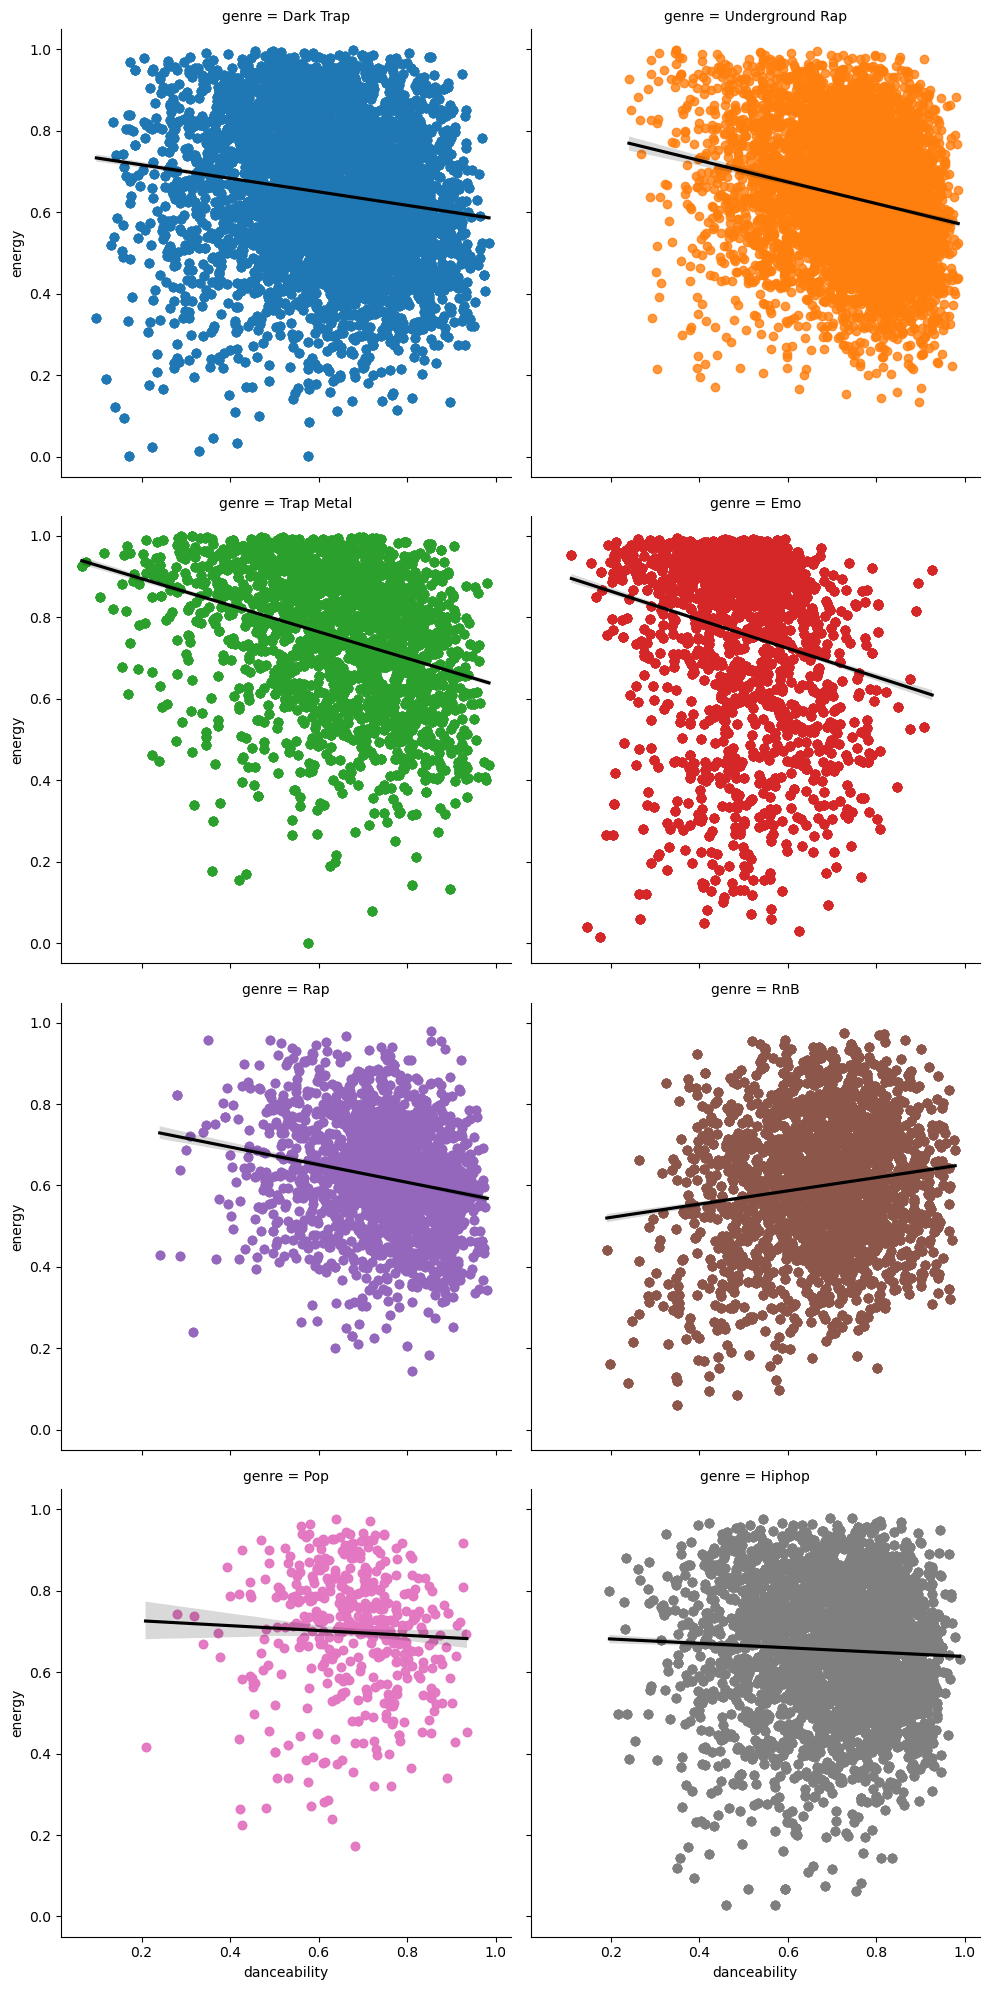

In [45]:
sns.lmplot(data=merged_df, x='danceability', y='energy', hue='genre', col='genre', col_wrap=2, line_kws={'color': 'black'})

## Interpretation

We wanted to find out if there was any correlation between the energy of a song and how danceable it is. First we took the raw correlation of all the data points and saw that it was moderately correlated at 0.4453. Then we plotted all our data points and segmented them via color by the various genres.

From there we wanted to see the numerical values of the different levels of correlation to energy and danceability by genre, so we broke it down. The most correlated between the various genres is Trap Metal at -0.3174. This is a weakly negative correlation. The least correlated was Pop at -0.0473, indicating that there is barely any correlation between energy and danceability for that genre.

# Question 3. How do danceability and valence interact across different genres?
This question examines whether the relationship between danceability and valence varies across genres, investigating whether specific genres show a stronger or different relationship between danceability and valence.
### Line Plots: danceability and Valence by Genre
This could be easily visualized with simple line charts, plotting danceability by genre and valence by genre, since the shapes of the resulting graphs are easily compared in an intuitive fashion.

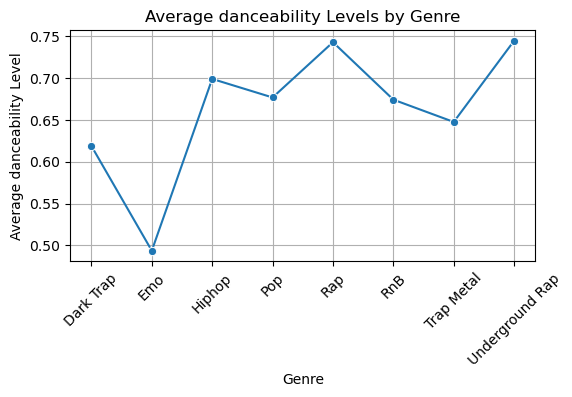

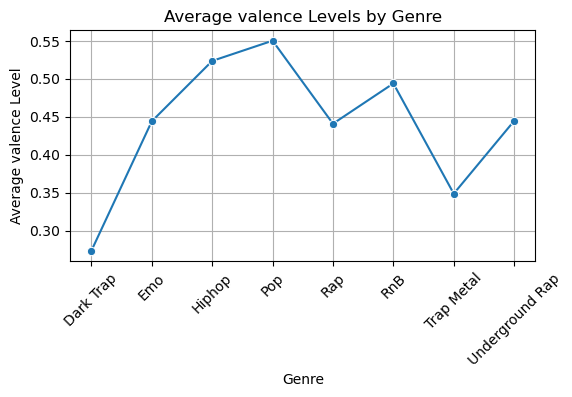

In [51]:
genre_danceability_avg = merged_df.groupby('genre')['danceability'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(data=genre_danceability_avg, x='genre', y='danceability', marker='o')
plt.title('Average danceability Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Average danceability Level')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

print()

genre_valence_avg = merged_df.groupby('genre')['valence'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(data=genre_valence_avg, x='genre', y='valence', marker='o')
plt.title('Average valence Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Average valence Level')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

comparing these 2 graphs doesn't show much of a connection betwee danceability and valence across genres:
- These attributes do tend to be of similar prominence for Hiphop, Pop, and to a lesser extend, RnB.
- Dark Trap and Emo are almost inverse, and Trap Metal is also quite different - suggesting that thematically "darker" genres get their danceability from somethig else... perhaps tempo?

## Scatter Plot: danceability vs Valence by Genre
In order to get a better high-level view of general trends, a scatter pot can be used to see the overall distribution and trend lines of any potential correlation between danceability and valence for the different genres.

<Figure size 1000x600 with 0 Axes>

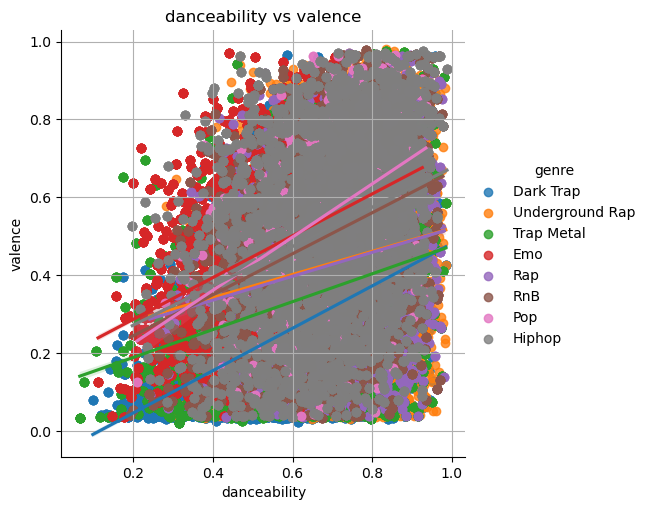

In [52]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='danceability', y='valence', data=merged_df, hue='genre')
plt.title('danceability vs valence')
plt.xlabel('danceability')
plt.ylabel('valence')
plt.grid(True)
plt.show()

The scatter plot shows more of a connection than the previous line graphs implied; overall, it looks like every genre does have a positive overall relationship between danceability and valence, it's just that the "darker" genres have less of one.

- Pop has the strongest correlation (highest angled trnd line)
- The weakest correlation appears to be in Rap (flattest trnd line) Increasing valence seems to be one way of increasing danceability, but the impact varies by genre.

## Conclusion
While valence does have a positive overall impact on danceability, its influence varies considerably depending on the genre. In particular, genres known for dark themes and subject matter benefit less from valence; it could reasonably be theorized that fans of these genres are less interested in the positivity that Valence seeks to measure, and therefore are less inclined to physically express themselves based on it. More optimistic genres, like Pop and R&B, show a stronger relationship between valance and danceability. One surprising result is Emo, which shows one of the stronger relationships among genres. This seems at odds with the aforementioned theory about genres like Trap Metal, because one would think that fans of Emo music would find bright, upbeat musical positivity to be trite. Perhaps there is an element of irony involved?

# Question 4. How do energy and loudness levels vary across various music genres?

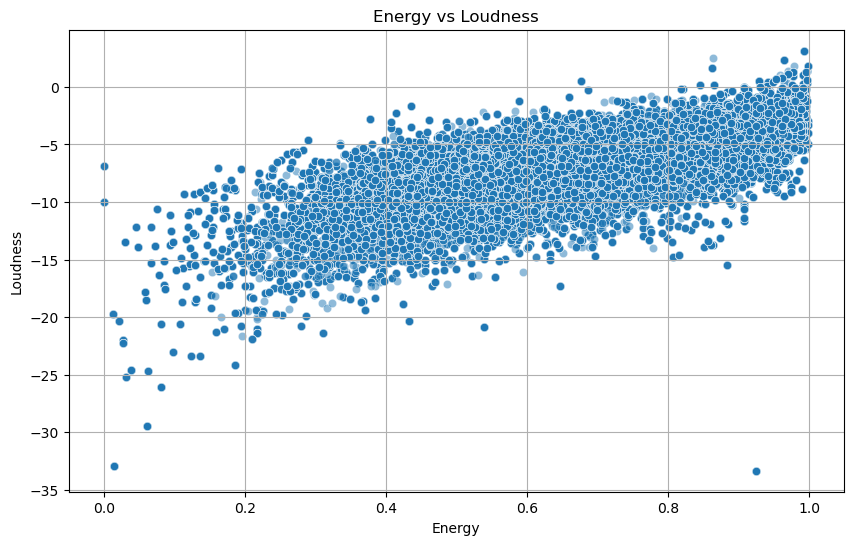

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='energy', y='loudness', alpha=0.5)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.grid(True)
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_11430/536369663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='energy', data=merged_df, palette='viridis')
/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_11430/536369663.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='loudness', data=merged_df, palette='viridis')


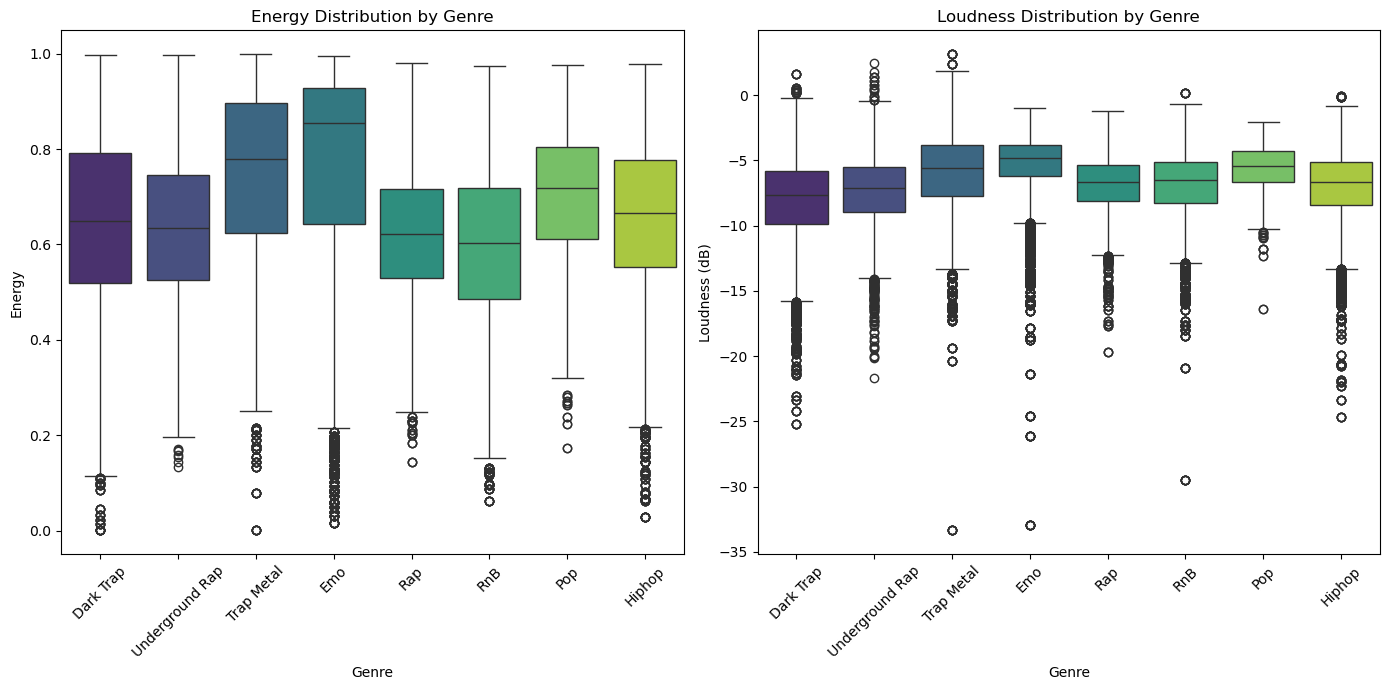

In [54]:
plt.figure(figsize=(14, 7))

# Box plot for Energy
plt.subplot(1, 2, 1)
sns.boxplot(x='genre', y='energy', data=merged_df, palette='viridis')
plt.title('Energy Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)

# Box plot for Loudness
plt.subplot(1, 2, 2)
sns.boxplot(x='genre', y='loudness', data=merged_df, palette='viridis')
plt.title('Loudness Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness (dB)')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

### Boxplots 
Energy: The energy boxplot reveals that Dark Trap, Trap Metal, and Emo have a broad range of energy values, indicating variability in track intensity. In contrast, Rap and Pop exhibit narrower ranges of energy. 

Loudness: Dark Trap and Trap Metal genres show the widest distribution, while other genres have more consistent loudness levels.

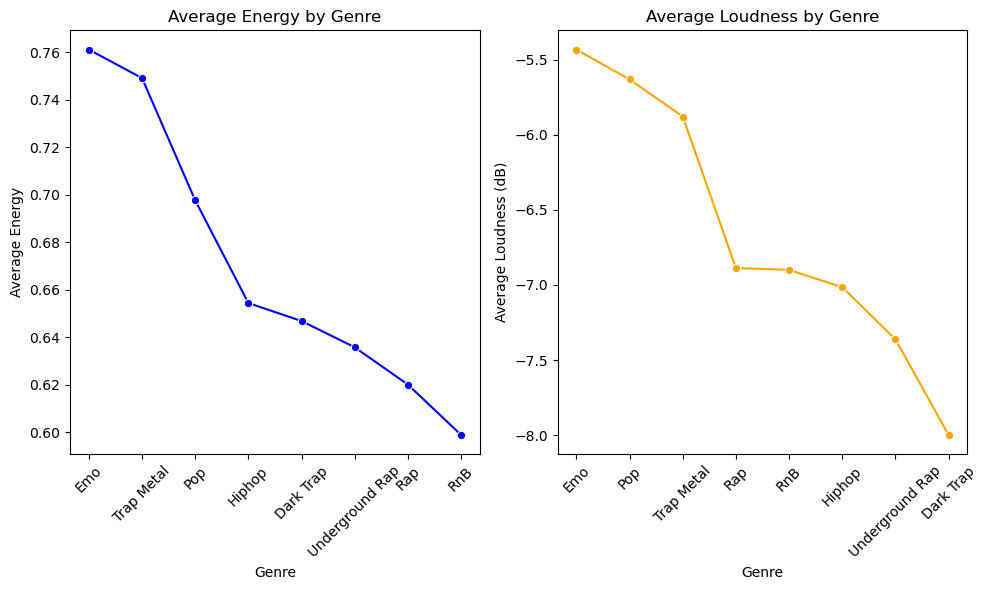

In [59]:
avg_values_by_genre = merged_df.groupby('genre').agg({
    'energy': 'mean',
    'loudness': 'mean'
}).reset_index()
plt.figure(figsize=(10, 6))

# Plot average energy by genre
plt.subplot(1, 2, 1)
avg_values_by_genre = avg_values_by_genre.sort_values(by='energy', ascending=False)
sns.lineplot(data=avg_values_by_genre, x='genre', y='energy', marker='o', color='blue')
plt.title('Average Energy by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy')
plt.xticks(rotation=45)

# Plot average loudness by genre
plt.subplot(1, 2, 2)
avg_values_by_genre = avg_values_by_genre.sort_values(by='loudness', ascending=False)
sns.lineplot(data=avg_values_by_genre, x='genre', y='loudness', marker='o', color='orange')
plt.title('Average Loudness by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Loudness (dB)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Line Graphs
##### Average Energy by Genre

The line graph of average energy shows that Emo and Trap Metal genres have the highest energy levels, while Rap and RnB have lower energy levels.

##### Average Loudness by Genre

The line graph of average loudness indicates that Emo, Pop, and Trap Metal genres have higher average loudness, whereas Dark Trap and Underground Rap genres have lower average loudness.

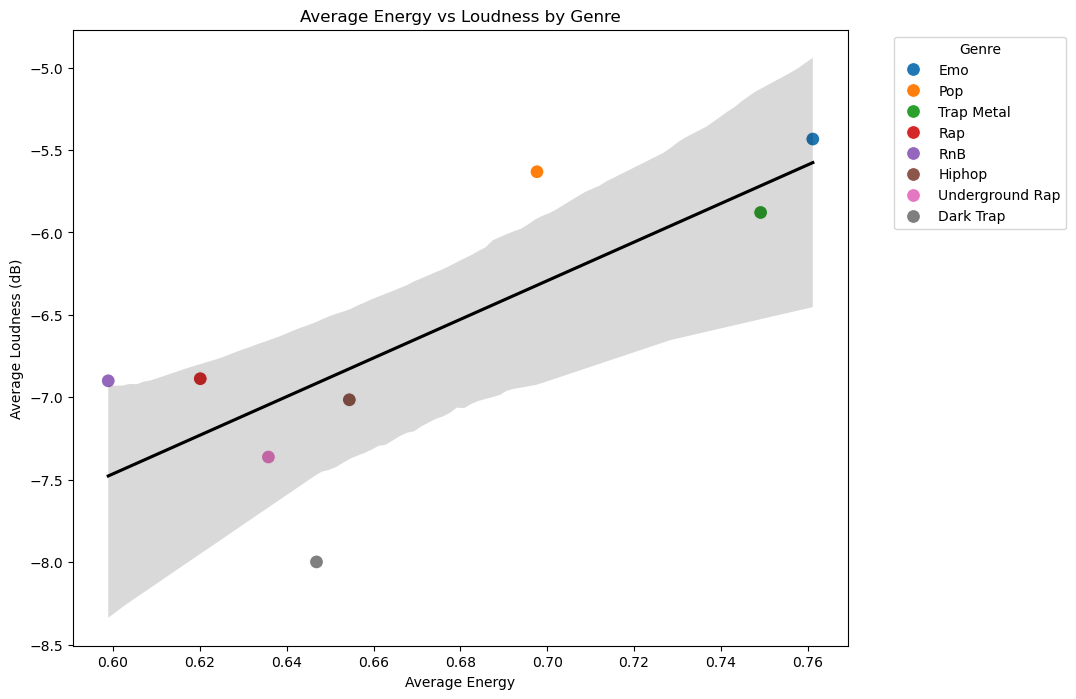

In [56]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=avg_values_by_genre,
    x='energy',
    y='loudness',
    hue='genre',
    palette='tab10',
    s=100
)

# add a regression line
sns.regplot(
    data=avg_values_by_genre,
    x='energy',
    y='loudness',
    scatter=False,
    line_kws={'color': 'black'}
)

plt.xlabel('Average Energy')
plt.ylabel('Average Loudness (dB)')
plt.title('Average Energy vs Loudness by Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Scatter Plot with Regression Line: 
The scatterplot illustrates a positive correlation between energy and loudness. This trend is primarily driven by the higher energy and loudness of Emo, Pop, and Trap Metal. Conversely, genres such as Dark Trap, Hip Hop, and Underground Rap are situated lower on the graph, with Dark Trap, Hip Hop, and Underground Rap showing higher energy but lower loudness compared to RnB and Rap, which have less energy but higher loudness.

#

## Interpretation
### Goal: 

Our objective was to delve into the average energy and loudness levels across music genres, building on our earlier observation of a strong positive correlation (0.71) between these two attributes.

### Approach:

Boxplots: We began by examining boxplots to understand the distribution and variability of energy and loudness within each genre. This initial step revealed the range and spread of these attributes, helping us identify genres with high or low variability and highlighting which genres exhibit extreme values.

Line Graphs: Next, we utilized line graphs to observe trends in average energy and loudness by genre. These visualizations allowed us to see how each genre's average values compare over the spectrum and identify patterns in the data. 

Regression Plot: Finally, we employed a regression plot to solidify our understanding of the relationship between energy and loudness. This plot reinforced the observed positive correlation, illustrating that genres with higher energy levels generally also exhibit higher loudness.

### Key Insights:

Unexpected Findings: Contrary to expectations, Emo—often associated with introspection and subtlety—demonstrated high levels of both energy and loudness. This suggests that certain Emo tracks are characterized by intense and energetic elements, deviating from the typically quieter image of the genre.

Genre Characteristics: Pop and Trap Metal align with their high-energy, vibrant soundscapes, consistently showing high average energy and loudness. In contrast, genres like Dark Trap, Underground Rap, and Hip Hop generally have lower loudness, indicating a focus on more nuanced and subtle auditory experiences with moderate energy levels.

Balance in Rap and RnB: Rap and RnB show lower energy levels relative to all other genres but maintain moderate loudness. This reflects a blend of both softer and more intense tracks within these genres.


### Conclusion
Overall, the positive correlation between energy and loudness confirms that genres with higher energy are typically louder. This analysis not only enhances our understanding of genre-specific characteristics but also sheds light on broader trends in music production, revealing how different genres cater to diverse listener preferences and auditory experiences.

# Energy Prediction Model 

Mean Squared Error: 0.015823468416294943
R-squared: 0.5512879305073927


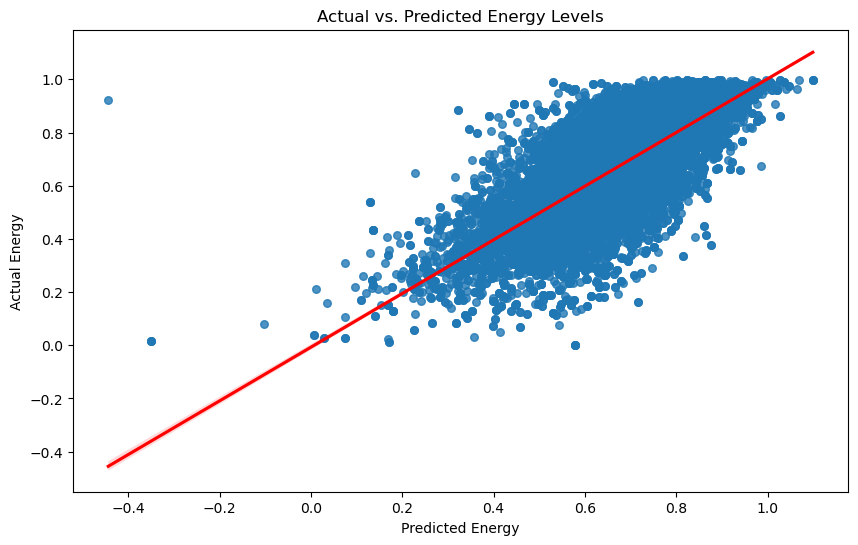

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = merged_df[['tempo', 'danceability', 'loudness', 'valence']]
y = merged_df['energy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# df with predictions and actual values
results_df = pd.DataFrame({
    'actual_energy': y_test,
    'predicted_energy': y_pred
})
results_df.reset_index(drop=True, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='predicted_energy', y='actual_energy', data=results_df, scatter_kws={'s':30}, line_kws={'color':'red'})
plt.title('Actual vs. Predicted Energy Levels')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

## Conclusion
Mean Squared Error (MSE): The MSE value provides an indication of the average squared difference between the actual and predicted values. Lower MSE values suggest that the model's predictions are closer to the actual values. A score of 0.0158 indicates that the model is relatively accurate, with predictions that are quite close to the actual energy values.

R-squared Value (R²): The R-squared value measures how well the model's predictions match the actual data. An R² value of 0.551 implies that approximately 55.1% of the variance in the energy levels can be explained by the model. This indicates a moderate level of model performance.

Plot Analysis: The scatter plot of actual vs. predicted energy levels helps visualize how well the model’s predictions align with the actual values. A closer alignment between the predicted and actual values (points near the red regression line) indicates better model performance.